# RESEARCH QUESTION

The dataset to be used Is the UCI Sentiment Labeled Sentences Data Set

The research question is:
The company wishes to improve customer satisfaction and retention. Can we analyze customers’
reviews to predict whether their sentiments are positive or negative by using Neural Networks
and Natural Language Processing?


# OBJECTIVES AND GOALS

The goal is to conduct Sentiment Analysis and provide stakeholders with insights on how customers’ sentiments differ using the reviews from Amazon, Yelp, and IMDB. Patterns will be identified, so that stakeholders have a better understanding of their customers’ sentiments. With this, effective strategies can be developed to improve consumers’ satisfaction.


# PRESCRIBED NETWORK
The Deep Learning Neural Network (DNN) which is also a Recurrent Neural Network (RNN) can be used to perform the text classification task and trained to produce useful prediction on text sequences. This will be used for sequence classification eg. the sentiment classification. It can also conduct sequence labelling, where the tagging of parts of speech occurs. Finally, RNN is used for sequence generation- machine translation. It uses connections between neurons. These connections form directed cycle, which then creates feedback. RNN remembers previous computations and will use it for the next element. The use of embedding layer, multiple hidden layers and an output layer allows for final classification and a binary output. This output is used to predict if a sentiment is positive or negative.


In [1]:
#import packages
import sys
import os

#packages imported for predictive analysis
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import re
import tensorflow as tf
import keras

#packages imported for tensorflow and neural network API
from tensorflow import keras
from keras import preprocessing

#import more tensoflow modules
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

#import pandas, numpy and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import seaborn as sns
import nltk
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#import and ignore warnings
import warnings
warnings.filterwarnings('ignore')


2023-01-22 23:39:05.105442: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/draihome/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/draihome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/draihome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/draihome/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#load and check datasets
amazondf = pd.read_csv('amazon_cells_labelled.txt',delimiter='\t',header =None, names=['review','rating'],dtype={'locationid':np.int64})
yelpdf = pd.read_csv('yelp_labelled.txt',delimiter='\t',header =None, names=['review','rating'],dtype={'locationid':np.int64})
imdbdf = pd.read_csv('imdb_labelled.txt',delimiter='\t',header =None, names=['review','rating'],dtype={'locationid':np.int64})

In [3]:
amazondf.head()

,review,rating
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:

yelpdf.head()

,review,rating
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
imdbdf.head()

,review,rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [6]:
#combine all 3 datasets and then check the df
df = pd.concat([amazondf,imdbdf, yelpdf])
df.reset_index(inplace=True)

# DATA EXPLORATION

In [7]:
#retrieve info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   2748 non-null   int64 
 1   review  2748 non-null   object
 2   rating  2748 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 64.5+ KB


In [8]:
#retrieve statistics of dataframe
df.describe()

,index,rating
count,2748.000000,2748.000000
mean,465.203057,0.504367
std,276.612338,0.500072
min,0.000000,0.000000
25%,228.750000,0.000000
50%,457.500000,1.000000
75%,686.250000,1.000000
max,999.000000,1.000000


In [9]:
#check for null values
df.isna().sum()

index     0
review    0
rating    0
dtype: int64

In [10]:
#retrieve counts of rating
df['rating'].value_counts()

1    1386
0    1362
Name: rating, dtype: int64

Text(0.5, 0, 'Negative Feedback      Postive Feedback')

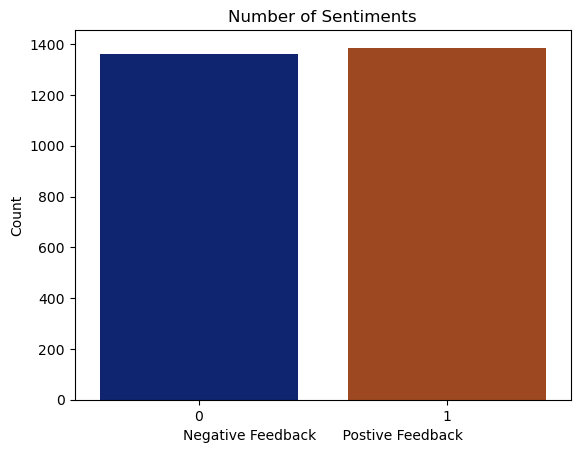

In [11]:
#distribution of sentiments
sns.countplot(df.rating, x=df.rating, palette='dark')
plt.title('Number of Sentiments')
plt.ylabel('Count')
plt.xlabel('Negative Feedback      Postive Feedback')

In [12]:
#add number of words and characters columns
df['number of words'] = [len(x.split()) for x in df['review'].tolist()]
df['number of chars'] = df['review'].apply(len)
df

,index,review,rating,number of words,number of chars
0,0,So there is no way for me to plug it in here i...,0,21,82
1,1,"Good case, Excellent value.",1,4,27
2,2,Great for the jawbone.,1,4,22
3,3,Tied to charger for conversations lasting more...,0,11,79
4,4,The mic is great.,1,4,17
...,...,...,...,...,...
2743,995,I think food should have flavor and texture an...,0,12,66
2744,996,Appetite instantly gone.,0,3,24
2745,997,Overall I was not impressed and would not go b...,0,10,50
2746,998,"The whole experience was underwhelming, and I ...",0,16,91


In [13]:
#Convert uppercase letters to lower case letters
df['review'] = df.review.apply(lambda x: " ".join(x.lower() for x in x.split()))

#check dataframe
df['review']

0       so there is no way for me to plug it in here i...
1                             good case, excellent value.
2                                  great for the jawbone.
3       tied to charger for conversations lasting more...
4                                       the mic is great.
                              ...                        
2743    i think food should have flavor and texture an...
2744                             appetite instantly gone.
2745    overall i was not impressed and would not go b...
2746    the whole experience was underwhelming, and i ...
2747    then, as if i hadn't wasted enough of my life ...
Name: review, Length: 2748, dtype: object

### Presence of unusual characters (e.g., emojis, non-English characters, etc.)
The dataset had text with unusual characters or special characters.
I used the following code to remove these characters:


In [14]:
#remove punctuation
import re
p = re.compile(r'[^\w\s]+')
df['review'] = [p.sub('',x) for x in df['review'].tolist()]
df

,index,review,rating,number of words,number of chars
0,0,so there is no way for me to plug it in here i...,0,21,82
1,1,good case excellent value,1,4,27
2,2,great for the jawbone,1,4,22
3,3,tied to charger for conversations lasting more...,0,11,79
4,4,the mic is great,1,4,17
...,...,...,...,...,...
2743,995,i think food should have flavor and texture an...,0,12,66
2744,996,appetite instantly gone,0,3,24
2745,997,overall i was not impressed and would not go back,0,10,50
2746,998,the whole experience was underwhelming and i t...,0,16,91


### Stop Words

In [15]:
#retrieve, filter stop words and tokenize words that are not stop words.
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

data_set = []
for sentence in df.review:
    data_set.append([word for word in word_tokenize(sentence) if word not in stop_words])
print(data_set)

[['way', 'plug', 'us', 'unless', 'go', 'converter'], ['good', 'case', 'excellent', 'value'], ['great', 'jawbone'], ['tied', 'charger', 'conversations', 'lasting', '45', 'minutesmajor', 'problems'], ['mic', 'great'], ['jiggle', 'plug', 'get', 'line', 'right', 'get', 'decent', 'volume'], ['several', 'dozen', 'several', 'hundred', 'contacts', 'imagine', 'fun', 'sending', 'one', 'one'], ['razr', 'owneryou', 'must'], ['needless', 'say', 'wasted', 'money'], ['waste', 'money', 'time'], ['sound', 'quality', 'great'], ['impressed', 'going', 'original', 'battery', 'extended', 'battery'], ['two', 'seperated', 'mere', '5', 'ft', 'started', 'notice', 'excessive', 'static', 'garbled', 'sound', 'headset'], ['good', 'quality', 'though'], ['design', 'odd', 'ear', 'clip', 'comfortable'], ['highly', 'recommend', 'one', 'blue', 'tooth', 'phone'], ['advise', 'everyone', 'fooled'], ['far', 'good'], ['works', 'great'], ['clicks', 'place', 'way', 'makes', 'wonder', 'long', 'mechanism', 'would', 'last'], ['wen

### TOKENIZATION

Packages such as the tensorflow.keras were imported before the Tokenization process. 

The goal of the tokenization process is to ensure the text in the data, is separated into tokens. These tokens can be referred to smaller chunks of words and characters. Each are assigned to a word index. This aids in the training process. I was able to retrieve the vocabulary size after removing punctuations. Another goal is to prepare for lemmatization. This where similar words would be transformed to their base form based on the context the word was being used.
!

In [16]:
vocab_size = 50000
x = df['review']
print('''\n''',x)

#tokenization

tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)
print('''\n''',x)


 0       so there is no way for me to plug it in here i...
1                               good case excellent value
2                                   great for the jawbone
3       tied to charger for conversations lasting more...
4                                        the mic is great
                              ...                        
2743    i think food should have flavor and texture an...
2744                              appetite instantly gone
2745    overall i was not impressed and would not go back
2746    the whole experience was underwhelming and i t...
2747    then as if i hadnt wasted enough of my life th...
Name: review, Length: 2748, dtype: object

 [[27, 49, 5, 59, 118, 12, 73, 6, 367, 7, 11, 67, 11, 1, 183, 639, 3, 77, 62, 4, 2209], [18, 152, 99, 511], [20, 12, 1, 1062], [2210, 6, 236, 12, 1063, 1064, 74, 75, 1450, 2211, 294], [1, 855, 5, 20], [3, 23, 6, 2212, 1, 367, 6, 89, 7, 6, 295, 71, 146, 6, 89, 465, 368], [46, 21, 23, 369, 1451, 60, 369, 2213, 1065, 1

### Word Index

In [17]:
#retrieve word index
wordindex = tokenizer.word_index
wordindex

{'the': 1,
 'and': 2,
 'i': 3,
 'a': 4,
 'is': 5,
 'to': 6,
 'it': 7,
 'this': 8,
 'of': 9,
 'was': 10,
 'in': 11,
 'for': 12,
 'not': 13,
 'that': 14,
 'with': 15,
 'my': 16,
 'very': 17,
 'good': 18,
 'on': 19,
 'great': 20,
 'you': 21,
 'but': 22,
 'have': 23,
 'are': 24,
 'movie': 25,
 'as': 26,
 'so': 27,
 'phone': 28,
 'film': 29,
 'its': 30,
 'all': 31,
 'be': 32,
 'one': 33,
 'had': 34,
 '0': 35,
 'at': 36,
 '1': 37,
 'food': 38,
 'like': 39,
 'just': 40,
 'place': 41,
 'time': 42,
 'were': 43,
 'service': 44,
 'an': 45,
 'if': 46,
 'from': 47,
 'really': 48,
 'there': 49,
 'bad': 50,
 'they': 51,
 'we': 52,
 'has': 53,
 'out': 54,
 'well': 55,
 'about': 56,
 'dont': 57,
 'would': 58,
 'no': 59,
 'or': 60,
 'your': 61,
 'by': 62,
 'best': 63,
 'only': 64,
 'even': 65,
 'ever': 66,
 'here': 67,
 'also': 68,
 'will': 69,
 'back': 70,
 'up': 71,
 'when': 72,
 'me': 73,
 'more': 74,
 'than': 75,
 'quality': 76,
 'go': 77,
 'what': 78,
 'love': 79,
 'ive': 80,
 'he': 81,
 'can': 82,

### Word Embedding Length

The proposed word embedding length is 9. This value was derived from the fourth root of the
vocabulary size. Therefore, I calculated the square root of the square root. This value was
rounded to the nearest integer.

In [18]:
#retrieve the word embedding length
len_w = (len(wordindex)+1)
max_sequence_embedding = int(round(np.sqrt(np.sqrt(len_w)), 0))
max_sequence_embedding

9

### Vocabulary Size

In [19]:
#retrieve vocabulary size
vocabulary_size = len_w
vocabulary_size

5401

### Lemmatization

In [20]:
#import lemmatizer package and perform lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lem (tkn_txt):
    text=[lemmatizer.lemmatize(word)for word in tkn_txt]
    return text

In [21]:
df['review'].apply(lambda x: lem(x))
df['lemma_words'] = [len(x.split()) for x in df['review'].tolist()]
df['lemma_chars'] = df['review'].apply(len)
df.head(100)

,index,review,rating,number of words,number of chars,lemma_words,lemma_chars
0,0,so there is no way for me to plug it in here i...,0,21,82,21,81
1,1,good case excellent value,1,4,27,4,25
2,2,great for the jawbone,1,4,22,4,21
3,3,tied to charger for conversations lasting more...,0,11,79,11,76
4,4,the mic is great,1,4,17,4,16
...,...,...,...,...,...,...,...
95,95,will order from them again,1,5,27,5,26
96,96,if you plan to use this in a car forget about it,0,12,49,12,48
97,97,i found this product to be waaay too big,0,9,41,9,40
98,98,best ive found so far ive tried 2 other bluet...,1,30,148,29,139


### Statistical justification for the chosen maximum sequence length

The chosen maximum length was 1384. This number would be used when padding is required for sequences with shorter length. This would preserve the available input data as each sentence would have the same length. These sentences would be able to fit in a matrix.


In [22]:
#max length of sequence
maxlen = np.max(df.lemma_words)
maxlen

1384

# Padding Process

The padding process is known to be Neural Network technique. It was used to standardize the length of sequences. This was conducted after importing pad_sequences from the tensorflow.keras package. The padding occurred after the text sequence. The same shape and size of the input is required by the Neural Network. Performance will be improved by the preservation of the shape of tensor dimensions.  Below is the code for the padding process and output of a single sequence.

In [23]:
#import padding sequence library
from tensorflow.keras.preprocessing.sequence import pad_sequences
x = pad_sequences(x, maxlen, padding = 'post', truncating = 'post')
print(x.shape)

(2748, 1384)


In [24]:
#display a single padded sequence
np.set_printoptions(threshold=sys.maxsize)
print(x[0])

[  27   49    5   59  118   12   73    6  367    7   11   67   11    1
  183  639    3   77   62    4 2209    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

# Split training and Test Sets

In [25]:
y=df['rating']

In [26]:
#Split to train and test sets
X_train, X_test,y_train, y_test = train_test_split(x,y, test_size=0.20, shuffle=False) 

In [27]:
#retreve shapes of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2198, 1384)
(550, 1384)
(2198,)
(550,)


In [28]:
#save the datasets
pd.DataFrame(X_train).to_csv('X_train_pad_set')
pd.DataFrame(X_test).to_csv('X_test_pad_set')
pd.DataFrame(y_train).to_csv('y_train_pad_set')
pd.DataFrame(y_test).to_csv('y_test_pad_set')

# Keras Model

In [29]:
#import packages for model
from tensorflow.keras import Sequential
from keras.layers import Activation, SimpleRNN
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
#create sequential model from Keras
model = Sequential()

2023-01-22 23:39:29.037182: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
#add parameters to the model

#add embedding layer
model.add(Embedding(input_dim = vocabulary_size,output_dim = max_sequence_embedding, input_length = maxlen, trainable=True))

#add dropout layer to prevent overfitting
model.add(keras.layers.Flatten())

#add dropout layer
model.add(Dropout(rate=0.25))

#add the hidden Dense layer(8)and Dense output layer of and sigmoid
model.add(Dense(16,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# MODEL SUMMARY
This is an output of the model summary. The components of the Keras model were visualized.

# NETWORK ARCHITECTURE

A sequential model was built from the Keras neural network.
The Embedding hidden and output layers were added to the model. The Embedding layer had the
input_dim equal to vocabulary size (5401), and output_dim = max_sequence_embedding (9). It
had 48609 parameters. It was accompanied by the Flatten layer which had 0 parameters. The
next layer was the Dropout layer with the rate=0.25. It had no parameters. This was used to
prevent overfitting. The Dense layer had 16 neurons and 199312 parameters
The output layer was a Dense layer set to 1 neuron, as we only required a binary output. The
activation was sigmoid. It had 17 parameters.

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1384, 9)           48609     
                                                                 
 flatten (Flatten)           (None, 12456)             0         
                                                                 
 dropout (Dropout)           (None, 12456)             0         
                                                                 
 dense (Dense)               (None, 16)                199312    
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 247,938
Trainable params: 247,938
Non-trainable params: 0
_________________________________________________________________


### Activation functions

The choice of the activation function in the output layer, sigmoid, was because this non-linear function can be used to predict the probability of an output. This falls between 0 and 1 which is considered binary classification.


### Number of nodes per layer

The first, embedding layer, required an input of the same as the vocabulary size, and had 9 nodes which was the same as the word embedding length. The Flatten and Dropout layers had no nodes. The next layer, Dense had 16 nodes. The last Dense layer had only one node. This was chosen because we only required one output, 0 or 1.

### Loss function
Because we used sigmoid as the activation function, the loss function chosen was binary_crossentropy.  It is ideal for binary classification as the sentiments are seen as 0 or 1. 

### Optimizer
The Adaptive Moment (Adam) optimizer was used. It is one of the most popular optimization algorithms. This is not much needed to change parameters when using Adam. It works efficiently in many different neural networks, even when using their default parameter values. The optimizer handles noise well in the input model. Therefore, it will reduce overfitting.

### Stopping criteria
The stopping criteria implemented via a callback was the Early Stopping Monitor. This was chosen because it reduces overfitting and improves generalization in the final model. The early stopping criteria parameter, patience, was set to 2. This would allow two epochs after no improvement on the validation set.

### Evaluation metric
The evaluation metric was Accuracy. This was used for training as the goal was to predict rating based on a customer’s review.



In [34]:
#stopping criteria

early_stopping_monitor = EarlyStopping(patience=2)

#fit model to data
history = model.fit(X_train,y_train, validation_split=0.2, epochs=10, batch_size=64, callbacks=early_stopping_monitor, verbose=True)

Epoch 1/10
28/28 [==============================] - 2s 42ms/step - loss: 0.7254 - accuracy: 0.4801 - val_loss: 0.7031 - val_accuracy: 0.4409
Epoch 2/10
28/28 [==============================] - 1s 48ms/step - loss: 0.6911 - accuracy: 0.5313 - val_loss: 0.6850 - val_accuracy: 0.5591
Epoch 3/10
28/28 [==============================] - 1s 41ms/step - loss: 0.6677 - accuracy: 0.6337 - val_loss: 0.6842 - val_accuracy: 0.5705
Epoch 4/10
28/28 [==============================] - 1s 37ms/step - loss: 0.6184 - accuracy: 0.7582 - val_loss: 0.6587 - val_accuracy: 0.6614
Epoch 5/10
28/28 [==============================] - 1s 51ms/step - loss: 0.5263 - accuracy: 0.8874 - val_loss: 0.6249 - val_accuracy: 0.6773
Epoch 6/10
28/28 [==============================] - 1s 41ms/step - loss: 0.4070 - accuracy: 0.9278 - val_loss: 0.6005 - val_accuracy: 0.7023
Epoch 7/10
28/28 [==============================] - 1s 39ms/step - loss: 0.3035 - accuracy: 0.9443 - val_loss: 0.5733 - val_accuracy: 0.6773
Epoch 8/10
28

In [35]:
#model accuracy on test data
acc_score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {acc_score[0]} / Test accuracy: {acc_score[1]}')

Test loss: 0.543917715549469 / Test accuracy: 0.7236363887786865


In [36]:
#check history

history.history

{'loss': [0.7253641486167908,
  0.6910790205001831,
  0.667726457118988,
  0.6183651685714722,
  0.526324987411499,
  0.4070417284965515,
  0.30354511737823486,
  0.22556135058403015,
  0.16818572580814362,
  0.12545695900917053],
 'accuracy': [0.48009100556373596,
  0.5312855243682861,
  0.6336746215820312,
  0.7582480311393738,
  0.8873720169067383,
  0.9277588129043579,
  0.9442548155784607,
  0.9647326469421387,
  0.9761092066764832,
  0.9817975163459778],
 'val_loss': [0.7031427025794983,
  0.6850331425666809,
  0.6841898560523987,
  0.6586909890174866,
  0.6248648762702942,
  0.6004816293716431,
  0.5733439922332764,
  0.5808172225952148,
  0.5640098452568054,
  0.573384702205658],
 'val_accuracy': [0.44090908765792847,
  0.5590909123420715,
  0.5704545378684998,
  0.6613636612892151,
  0.6772727370262146,
  0.7022727131843567,
  0.6772727370262146,
  0.699999988079071,
  0.6954545378684998,
  0.6954545378684998]}

# FIT
The accuracy of the model on the training data after 10 epochs was 94%. Although high, I paid attention to the validation accuracy. This was 73.45%. I believed the model was reasonably fit as a stopping monitor, EarlyStopping, was used to address the overfitting. To get an even higher accuracy and better fit of the Keras model, we could add other layers and tune the hyperparameters of the network.


In [37]:
#create function for visualization

def plot_learningCurve(history, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'],loc='best')
    plt.show()
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
                

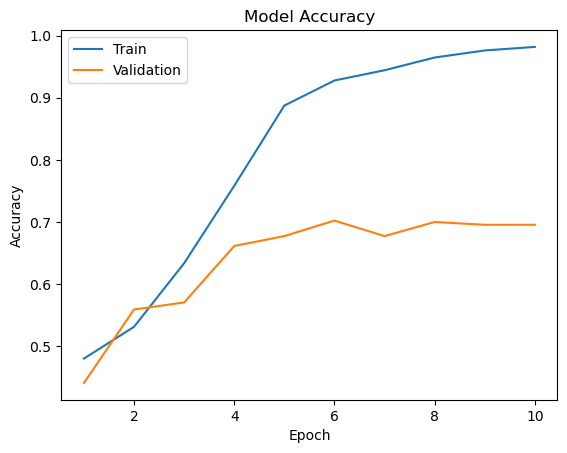

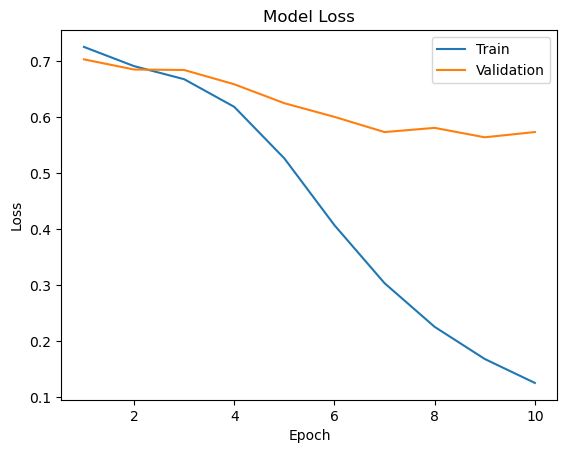

In [38]:
#plot model training and validation accuracy

plot_learningCurve(history, 10)

### PREDICTIVE ACCURACY

The overall predictive accuracy of this network was 74.18%. The trained network made 408 correct predictions and 142 wrong predictions. The network accurately made 183 true predictions of 259 positive reviews (72.97%). It predicted 225 correctly out of 291 negative reviews (77.32%).


18/18 [==============================] - 0s 3ms/step


[Text(117.24999999999999, 0.5, 'Actual'),
 Text(0.5, 99.24999999999997, 'Predictions')]

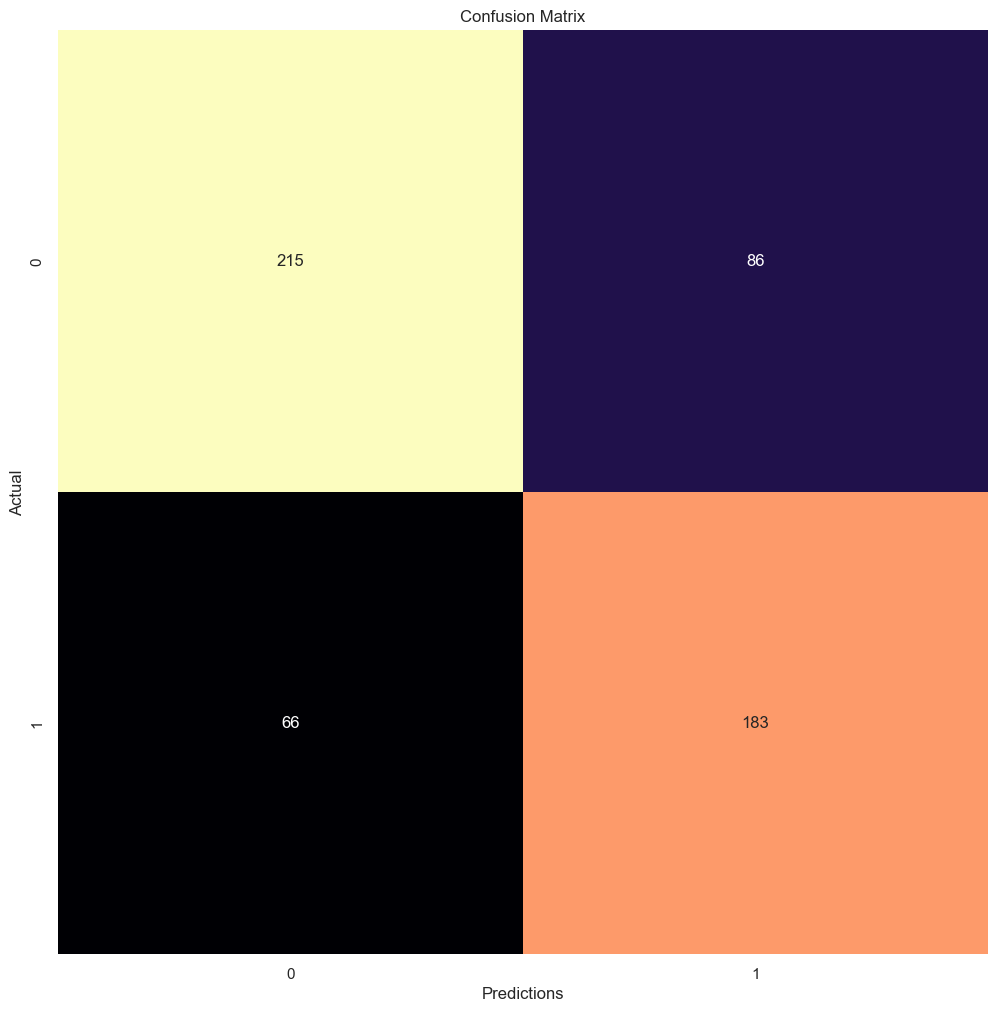

In [39]:
#create a confusion matrix

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC

predictions = model.predict(X_test)
predictions = np.round(predictions,0).astype(int)

conf_mat = confusion_matrix(y_test,predictions)
sns.set(rc={'figure.figsize':(12,12)})
plt.title('Confusion Matrix')
sns.heatmap(
    conf_mat,annot=True,
    fmt='d',cbar=False,
    cmap='magma').set(ylabel='Actual',xlabel='Predictions')

In [40]:
#save model
model.save('SentimentalAnalysisModel.h5')

# FUNCTIONALITY
The sequential model had successfully trained 2748 text reviews and their sentiment scores, recorded as labels, from IMDB, Yelp, and Amazon datasets.  After validation and testing, the model created, had 74.18% accuracy of predicting if sentiments are positive or negative, based on the data inputted. The model performed very well. This network architecture had multiple layers and provided a good amount of accuracy. During training, the parameters are tuned, and the network was able to extract the meaning of words.  Tanh function in the hidden layer ensured that errors easily passed through the layers. Sigmoid function in the output layer mapped values to 0 and 1. Training was very fast, and the model handled text classification very well. The network was able to predict whether sentiments were positive or negative.

# RECOMMENDATIONS

The sentiment analysis conducted proved to have reasonably accurate predictions. Based on this, stakeholders can identify whether customers’ reviews are considered positive or negative using my neural network model. They can then use the feedback from customers to adjust their operations, remove and add products/services that will increase customer satisfaction.  
